In [6]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('reviews.csv')
dataset.drop(columns="Id", inplace=True)
dataset

,Review,Label
0,good and interesting,5.0
1,"This class is very helpful to me. Currently, I...",5.0
2,like!Prof and TAs are helpful and the discussi...,5.0
3,Easy to follow and includes a lot basic and im...,5.0
4,Really nice teacher!I could got the point eazl...,4.0
...,...,...
33397,I have learned so much in the course. I would ...,5.0
33398,"good to have this tutorial, hopefully i can im...",5.0
33399,Very good introduction course with concise inf...,5.0
33400,it was harder than i have thought,5.0


In [7]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,Review,Label
0,good and interesting,5.0
1,"This class is very helpful to me. Currently, I...",5.0
2,like!Prof and TAs are helpful and the discussi...,5.0
3,Easy to follow and includes a lot basic and im...,5.0
4,Really nice teacher!I could got the point eazl...,4.0
...,...,...
31838,I have learned so much in the course. I would ...,5.0
31839,"good to have this tutorial, hopefully i can im...",5.0
31840,Very good introduction course with concise inf...,5.0
31841,it was harder than i have thought,5.0


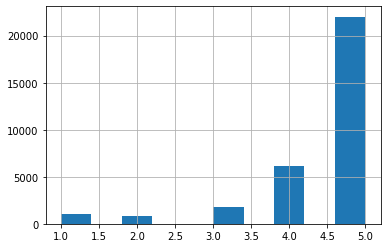

In [8]:
dataset['Label'].hist()

In [9]:
dataset['Label'].value_counts()

5.0    22013
4.0     6152
3.0     1835
1.0      990
2.0      852
Name: Label, dtype: int64

In [10]:
# 어중간한 3점 삭제해 버리기
rating_3 = dataset[dataset['Label']==3].index
del_3 = dataset.drop(rating_3)
dataset=del_3

In [11]:
dataset['Label'].value_counts()

5.0    22013
4.0     6152
1.0      990
2.0      852
Name: Label, dtype: int64

In [12]:
# 현재 4~5점(긍정)에 데이터가 너무 많음
#1~2점(부정)과 4~5점(긍정) 데이터 비율을 맞춰주기
def reduce_size(x):
    if len(x.index) > 70000:
        return x.sample(n=int(len(x.index)/35)) #70000/2200
    elif len(x.index) > 17000:
        return x.sample(n=int(len(x.index)/7)) #17000/2200
    else:
        return x

dataset = dataset.groupby('Label').apply(reduce_size).reset_index(drop=True)
dataset['Label'].value_counts()

# 4~5점 = 4601 / 1~2점 = 4622

4.0    6152
5.0    3144
1.0     990
2.0     852
Name: Label, dtype: int64

In [13]:
dataset.shape

(11138, 2)

In [14]:
# train과 test를 나눠주기 위한 준비
X = dataset['Review']
y = dataset['Label']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size=0.5,shuffle=True,  random_state=1004)
             
print('X_train shape:', X_train.shape)

print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)

print('y_test shape:', y_test.shape)

X_train shape: (5569,)
X_test shape: (5569,)
y_train shape: (5569,)
y_test shape: (5569,)


In [16]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 4.0    3072
5.0    1580
1.0     491
2.0     426
Name: Label, dtype: int64
----------------------------
test set: 4.0    3080
5.0    1564
1.0     499
2.0     426
Name: Label, dtype: int64


In [17]:
dataset.dtypes

Review     object
Label     float64
dtype: object

In [18]:
#replace has a default arg inplace=False. 
#Thus, your results will not affect each other and you will have to combine them into dataset['label']=dataset['label'].replace([1,2,4,5],[0,0,1,1]) or 
#dataset['label'].replace([1,2,4,5],[0,0,1,1],inplace=True)

dataset['Label']=dataset['Label'].replace([1,2,4,5],[0,0,1,1])

In [19]:
dataset['Label'].value_counts()

1.0    9296
0.0    1842
Name: Label, dtype: int64

In [20]:
X_train

7670     I Love this course, and I need more reviewing ...
5275     A very articulate orientation, which meticulou...
3812     The course was really good. They give you idea...
8103     Fun course. I learned a lot about nutrition an...
7042     The course is very interesting but includes es...
                               ...                        
8206             Very interesting and very well presented!
8391     It was an Awesome course. Really enjoyed doing...
9455     Good overview of business metrics supported by...
4127     The course is really interesting and it is ver...
10763    An amazing introductory course ! and Dr. Chagp...
Name: Review, Length: 5569, dtype: object

In [21]:
X_test

1719     Taking this course is like getting lost across...
5608     Good course, I only recommend to incorporate m...
1475     can't wait to rate this course! I hope I could...
560                 Too much theory less practical things.
7817     Some of the lectures were a little dull but th...
                               ...                        
9282     A worthwhile course that breaks down methods f...
10404                    Thank you, it was very practical!
7783     This course was very informative and I loved h...
10868    Very well organized course about this fascinat...
10199                     Great Course! I like it! Thanks!
Name: Review, Length: 5569, dtype: object

In [22]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 4.0    3072
5.0    1580
1.0     491
2.0     426
Name: Label, dtype: int64
----------------------------
test set: 4.0    3080
5.0    1564
1.0     499
2.0     426
Name: Label, dtype: int64


In [23]:
# concat()dms df와 series에 다 적용가능
train_set = pd.concat([X_train, y_train], axis = 1)
print(train_set)

                                                  Review  Label
7670   I Love this course, and I need more reviewing ...    4.0
5275   A very articulate orientation, which meticulou...    4.0
3812   The course was really good. They give you idea...    4.0
8103   Fun course. I learned a lot about nutrition an...    5.0
7042   The course is very interesting but includes es...    4.0
...                                                  ...    ...
8206           Very interesting and very well presented!    5.0
8391   It was an Awesome course. Really enjoyed doing...    5.0
9455   Good overview of business metrics supported by...    5.0
4127   The course is really interesting and it is ver...    4.0
10763  An amazing introductory course ! and Dr. Chagp...    5.0

[5569 rows x 2 columns]


In [24]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train_set['Review'][7], "html5lib")
print(train_set['Review'][:20])


example1.get_text()[:10]

7670    I Love this course, and I need more reviewing ...
5275    A very articulate orientation, which meticulou...
3812    The course was really good. They give you idea...
8103    Fun course. I learned a lot about nutrition an...
7042    The course is very interesting but includes es...
1193    Speakers sound so monotone and dry that they l...
8526    Thank you a most enjoyable and informative cou...
8452    Very clearly presented and easy to understand....
4494    Great course to get you setup - don't expect t...
4169    Addressing measure issues and concern with tod...
8906     The course is clear, simple and easy to hand on!
302       Not enough material to understand the concepts.
9131    Lovely teacher,More about HTML history,Intersting
6877    Great course - You're learning the foundations...
7946    Great beginning course to avoid being overwhel...
9324    This will help me to understand more about Bio...
402                                      The link to down
8029    Should

'The Capsto'

In [27]:
import re
letters_only= re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:10]

'The Capsto'

In [26]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()
# lower_case = letters_only['Review'].str.lower()      # Q str?

In [28]:
# 문자를 나눈다. => 토큰화
words = lower_case.split()
print(len(words))
words[:10]

15


['the',
 'capstone',
 'project',
 'has',
 'been',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect']

In [29]:
# 텍스트 데이터 전처리를 위해 다음을 다운로드 해야함
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [30]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [31]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

9


['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

In [32]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

wordss = [stemmer.stem(w) for w in words]
# 처리 후 단어
words[:10]


# from nltk.stem.porter import *
# stemmer = PorterStemmer()
# plurals = ['caresses', 'flies', 'dies', 'mules', 'denied']
# singles = [stemmer.stem(plural) for plural in plurals]  # ---> loop through the list and process each element. 

['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

In [33]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:10]

['capstone',
 'project',
 'getting',
 'delayed',
 'since',
 'jandont',
 'expect',
 'complete',
 'specialization']

In [34]:
def review_to_words(raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

In [35]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [36]:
%time clean_train_reviews = apply_by_multiprocessing(\
    train_set['Review'], review_to_words, workers=4)  

CPU times: user 25.8 ms, sys: 43.7 ms, total: 69.5 ms
Wall time: 3.13 s


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라메터 값을 수정
# 파라메터 값만 수정해도 캐글 스코어 차이가 많이 남
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             max_features = 20000
                            )
vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

In [38]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.
# pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.
pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [39]:
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

CPU times: user 738 ms, sys: 33.1 ms, total: 771 ms
Wall time: 791 ms


<5569x13798 sparse matrix of type '<class 'numpy.int64'>'
	with 118297 stored elements in Compressed Sparse Row format>

In [40]:
train_data_features.shape

(5569, 13798)

In [41]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

13798


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abdc',
 'abil',
 'abil explain',
 'abl',
 'abl complet',
 'abl exercis',
 'abl finish',
 'abl follow',
 'abl get']

In [42]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[ 4  2 25 ...  2  2  2]] abandon


,abandon,abdc,abil,abil explain,abl,abl complet,abl exercis,abl finish,abl follow,abl get,...,yet use,yield,yonsei,younger,youtub,zero,zero help,zero interact,zero star,zone
0,4,2,25,2,82,5,2,4,3,3,...,2,3,2,3,16,16,2,2,2,2


In [43]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,abandon,abdc,abil,abil explain,abl,abl complet,abl exercis,abl finish,abl follow,abl get,...,yet use,yield,yonsei,younger,youtub,zero,zero help,zero interact,zero star,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestClassifier(n_jobs=-1, random_state=2018)

In [45]:
# 체크해 보고 싶은 Review(string)를 Series에 담아준다.
reveiw_sample1 = "I wasted my time to watch this movie. I don't understand "
sample1 = pd.Series(reveiw_sample1)

In [46]:
# 테스트 데이터를 벡터화 함
%time test_data_features = pipeline.transform(sample1)
# %time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

CPU times: user 1.24 ms, sys: 0 ns, total: 1.24 ms
Wall time: 1.33 ms


In [49]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0]])

In [50]:
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

('abl follow', 'cours might good', 'cours mind', 'cours minor')

In [52]:
# 테스트 데이터를 넣고 예측한다.
result = forest.predict(test_data_features)
# result[:100] # 100개의 리뷰에 대해서 뽑을 때 

NotFittedError: ignored

In [48]:
print("결과:",result[:100])

NameError: ignored